In [162]:
import os
import time
import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from concorde.tsp import TSPSolver
from math import sqrt

In [163]:
root_dir = os.getcwd()
tsp_dir = os.path.join(root_dir, "tsplib")
#concorde_dir = os.path.join(root_dir, "pyconcorde/concorde")

In [164]:
sys.path.insert(0, root_dir)
sys.path.insert(0, tsp_dir)
#sys.path.insert(0, concorde_dir)

In [165]:
num_samples = 10000

In [166]:
n_clusters = 30

In [167]:
def gen_tsp_data():
    tsp_database = {}
    cities = os.listdir(tsp_dir)
    
    for city in cities:
        if city.endswith(".tsp"):
            with open(tsp_dir + '/' + city, 'r') as infile:
                lines = infile.readlines()
                for i in range(0, len(lines)):
                    line = lines[i]
                    if "DIMENSION" in line:
                        Dimension = line.strip().split(':')[1]
                        if not Dimension.isdigit():
                            continue
                    if "EDGE_WEIGHT_TYPE" in line:
                        EdgeWeightType = line.strip().split()[1]
                        if EdgeWeightType != "EUC_2D":
                            continue
                    if "NODE_COORD_SECTION" in line:
                        x_y = None
                        nodelist_x = []
                        nodelist_y = []
        
                        for j in range (1, int(Dimension)):
                            x_y = lines[i+1].strip().split()[1:]
    #                        print(x_y)
    #                        import pdb; pdb.set_trace()
                            x = x_y[0]
                            y = x_y[1]
                            nodelist_x.append(float(x))
                            nodelist_y.append(float(y))
                            i+=1
                        tsp_database.update({city[:-4]:[nodelist_x, nodelist_y]})
    return tsp_database    

In [168]:
tsp_database = gen_tsp_data()
problem_list = tsp_database.keys()
problem_list

dict_keys(['rat575'])

Problem : rat575


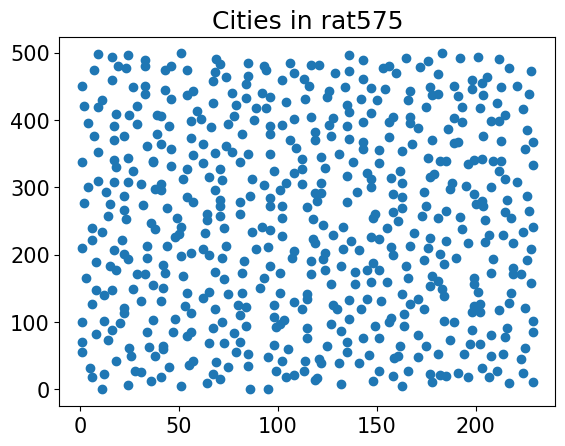

In [169]:
import pyproj as p
x = "rat575"
n_clusters = 500
coord_geo = False
if coord_geo == True:
     crs_wgs = p.Proj(init='epsg:4326')
     crs_bng = p.Proj(init = 'epsg:27700')
    
     tsp_database[x][0],tsp_database[x][1]  = p.transform(crs_wgs, crs_bng, tsp_database[x][1], tsp_database[x][0])
# for x in tsp_database:
print("Problem : " + x)
#    print(tsp_database[x])
X_coord = np.array(tsp_database[x][0])
Y_coord = np.array(tsp_database[x][1])
X_Y = np.array(list(zip(X_coord,Y_coord))).reshape(len(X_coord),2)
plt.plot()
plt.title('Cities in ' + x)
plt.scatter(X_coord, Y_coord)
plt.show()


lt.plot()<br>
lt.title('Cities in ' + x)<br>
lt.scatter(X_coord, Y_coord)<br>
lt.show()

In [170]:
from numpy import inf
X_Y[X_Y == inf] = 0



In [171]:

n_clusters = 50

/home/dynamo/a/yoo241/miniconda3/envs/ising/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


time = 0.2710 seconds


/home/dynamo/a/yoo241/miniconda3/envs/ising/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


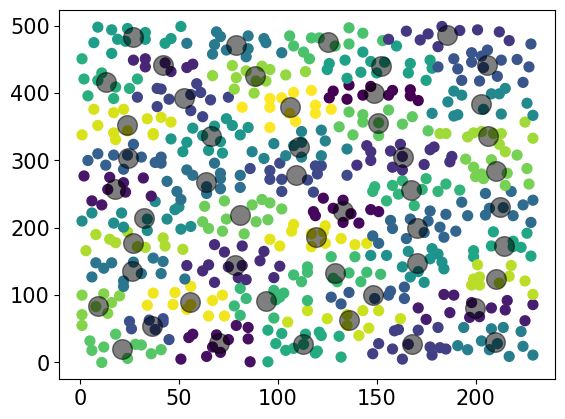

In [172]:
import time   
tic = time.perf_counter()
kmeanModel = KMeans(n_clusters, init='k-means++').fit(X_Y)
toc = time.perf_counter()
print(f"time = {toc-tic:0.4f} seconds")
kmeanModel.fit(X_Y)
y_kmeans = kmeanModel.predict(X_Y)
plt.scatter(X_Y[:,0], X_Y[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.rcParams.update({'font.size':15})
plt.show()

In [173]:
def get_clustered_cities(num_clust, labels_array):
    return np.where(labels_array == num_clust)

In [174]:
def plot_sys2_cities(sys2_cities):
    for k in K:
        plt.scatter(sys2_cities[k][:,0], sys2_cities[k][:,1])
        plt.show()

In [175]:
sys2_cities = []
K = range(0,n_clusters)
for k in K:
    sys2_cities.append([centers[k], X_Y[get_clustered_cities(k, kmeanModel.labels_)]])
    
for k in K:
    if (len(sys2_cities[k][1]) == 1):
        print("dirty cluster")


In [176]:
def gen_sys2_sol(benchmark, sys2_cities):
    sol_table = []
    timet =[]
    os.system("rm -rf sys2clusters_" + str(benchmark))   
    for k in range(0, len(sys2_cities)):
        curr_center = sys2_cities[k][0]
        curr_clust = sys2_cities[k][1]
        curr_clust_size = len(curr_clust)
        curr_clust_file = [curr_clust_size]
        curr_clust_file.append(curr_clust)
        os.system("mkdir -p sys2clusters_" + str(benchmark))   
#        os.system("cd " + "sys2clusters_" + str(benchmark) +"/")
        curr_filename = str(benchmark) + "_c" + str(k) +".in"
        curr_logfile = str(benchmark) + "_c" + str(k) +".out"
#        print("sys2clusters_" + str(benchmark) + "/" + curr_filename)
        inF = open("sys2clusters_" + str(benchmark) + "/" + curr_filename,"w")
        inF.write(str(curr_clust_size))
        inF.write("\n")
        for i in curr_clust:
            inF.write(str(i[0]) + " " + str(i[1]))
            inF.write("\n")      
        inF.close()
        
#        outF = open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"w")
        
        for i in range(0,1):
#            outF.write("pass " + str(i+1) + "\n")
            tic = time.perf_counter()
            os.system("./ising " + "sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
            toc = time.perf_counter()
            timet.append(toc-tic)
        
#            print(f"time = {toc-tic:0.4f} seconds")
        dist_array =[]
        sol =[]
        with open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"r") as outFile:
            lines = outFile.readlines()
            for i in range(0,len(lines)):
                line = lines[i]
                
                if "dist" in line:
                    dist_array.append(line.strip().split()[1])
                    continue
            dist = min(dist_array)
            for i in range(0,len(lines)):
                line = lines[i]
                if str(dist) in line:
                    for j in range(i-curr_clust_size,i-1):
                        curr = lines[j].strip().split()
                        sol.append(curr)
                    break
            outFile.close()
                    
                    
        print("done with cluster" + str(k))
        sol_table.append([curr_center, sol, dist])
    print("Ising time = " + str(max(timet)))
    sol_table = np.array(sol_table, dtype="object")
    np.save("sys2clusters_" + str(benchmark) + "/sol_table" ,sol_table)
       

In [177]:

gen_sys2_sol(x, sys2_cities)   



done with cluster0
done with cluster1
done with cluster2
done with cluster3
done with cluster4
done with cluster5
done with cluster6
done with cluster7
done with cluster8
done with cluster9
done with cluster10
done with cluster11
done with cluster12
done with cluster13
done with cluster14
done with cluster15
done with cluster16
done with cluster17
done with cluster18
done with cluster19
done with cluster20
done with cluster21
done with cluster22
done with cluster23
done with cluster24
done with cluster25
done with cluster26
done with cluster27
done with cluster28
done with cluster29
done with cluster30
done with cluster31
done with cluster32
done with cluster33
done with cluster34
done with cluster35
done with cluster36
done with cluster37
done with cluster38
done with cluster39
done with cluster40
done with cluster41
done with cluster42
done with cluster43
done with cluster44
done with cluster45
done with cluster46
done with cluster47
done with cluster48
done with cluster49
Ising time

In [178]:
from math import sin, cos, sqrt, atan2, radians
def compute_geo(p1,p2):
    R = 6373.0
    
    lat1 = radians(float(p1[0]))
    lon1 = radians(float(p1[1]))
    lat2 = radians(float(p2[0]))
    lon2 = radians(float(p2[1]))
    
    dlon = lon2 - lon1
    dlat = lat2 -lat1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    dist = R*c
    return dist

In [179]:
test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
test[0][2]

'141.391'

In [180]:
coord_geo == False
if coord_geo == True:
#     test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
    for i in range(len(test)):
        print(i)
        geo_dist = 0
        li = test[i][1]
        for idx,elem in enumerate(li):
            thiscity = elem
            nextcity = li[(idx+1)%len(li)]
            geo_dist += compute_geo(thiscity, nextcity)
        test[i][2] = geo_dist 
        print(geo_dist)
    np.save("sys2clusters_" + str(x) + "/sol_table" ,test)    


In [181]:
# os.system("python generate_tsp_concorde.py --num_nodes " + str(n_clusters))    
# os.system("python split_train_val.py --num_nodes " + str(n_clusters))    
    

mport pdb; pdb.set_trace()     

In [182]:
n_clusters


50

In [184]:
num_samples = 10000
set_nodes_coord = np.random.random([num_samples, n_clusters, 2])
with open("tsp" + str(n_clusters) + "_pr1002.txt", "w") as f:
    solver = TSPSolver.from_data(centers[:,0], centers[:,1], norm="EUC_2D")  
    solution = solver.solve()
    f.write( " ".join( str(x)+str(" ")+str(y) for x,y in centers) )
    f.write( str(" ") + str('output') + str(" ") )
    f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
    f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )

Problem Name: 765c84a7fac0498c9d9664ad1fe272f9
Problem Type: TSP
Number of Nodes: 50
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 2724
   0 Steps   Best: 2364   0.00 seconds
   1 Steps   Best: 2359   0.00 seconds
   3 Steps   Best: 2358   0.00 seconds
  25 Steps   Best: 2352   0.01 seconds
  25 Total Steps.
Best cycle length: 2352
Lin-Kernighan Running Time: 0.01
LK Initial Run: 2352.0
LK Run 0: 2352.0
LK Run from best tour: 2352.0
Time to find compression tour: 0.02 (seconds)
Set initial upperbound to 2352 (from tour)
Fractional Matching: 2348.0
Initial Running Time: 0.00 (seconds)
Basis Running Time: 0.00 (seconds)
Total fractional matching time: 0.00 (seconds)
Total Time for first_lp: 0.00 (seconds)
Setting upperbound to the initial bound: 2352.00
Loading lp...done in 0.00 seconds
LP has:  50 rows  67 columns  134 nonzeros
Dual opt returned after 0.00 seconds
Initial LP value: 2348.000000
Setting tolera